<a href="https://colab.research.google.com/github/Azhari-Kemalasari/Python/blob/main/EDA_dan_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis##


> Import Library



In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')



> Load Dataset



In [228]:
data = pd.read_excel('/content/drive/MyDrive/Dataset/sales_dataset.xlsx')



> Cek Tipe Data



In [229]:
data.dtypes

OrderID                      int64
Date                datetime64[ns]
CustomerID                   int64
Customers                   object
Customers Email             object
Customer Address            object
Customer City               object
ProdNumber                  object
Product Name                object
Category Name               object
Product Price              float64
Quantity                     int64
Total Sales                float64
dtype: object

In [230]:
for dtype,col in (list(zip(data.dtypes,data.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col,dtype)
    print(data[col].min(),data[col].max())
  else:
    print(col,dtype)
    print(data[col].unique())
  print()

OrderID int64
1 3340

Date datetime64[ns]
['2020-01-01T00:00:00.000000000' '2020-01-02T00:00:00.000000000'
 '2020-01-03T00:00:00.000000000' '2020-01-04T00:00:00.000000000'
 '2020-01-05T00:00:00.000000000' '2020-01-06T00:00:00.000000000'
 '2020-01-07T00:00:00.000000000' '2020-01-08T00:00:00.000000000'
 '2020-01-09T00:00:00.000000000' '2020-01-10T00:00:00.000000000'
 '2020-01-11T00:00:00.000000000' '2020-01-12T00:00:00.000000000'
 '2020-01-13T00:00:00.000000000' '2020-01-14T00:00:00.000000000'
 '2020-01-15T00:00:00.000000000' '2020-01-16T00:00:00.000000000'
 '2020-01-17T00:00:00.000000000' '2020-01-18T00:00:00.000000000'
 '2020-01-19T00:00:00.000000000' '2020-01-20T00:00:00.000000000'
 '2020-01-21T00:00:00.000000000' '2020-01-22T00:00:00.000000000'
 '2020-01-23T00:00:00.000000000' '2020-01-24T00:00:00.000000000'
 '2020-01-25T00:00:00.000000000' '2020-01-26T00:00:00.000000000'
 '2020-01-27T00:00:00.000000000' '2020-01-28T00:00:00.000000000'
 '2020-01-29T00:00:00.000000000' '2020-01-30T00:



> Melihat Struktur dan Preview Data



In [231]:
print(data.shape)
data.head()

(3339, 13)


,OrderID,Date,CustomerID,Customers,Customers Email,Customer Address,Customer City,ProdNumber,Product Name,Category Name,Product Price,Quantity,Total Sales
0,1,2020-01-01,1866,Farrand Vasler,fvaslerqt@comsenz.com,134 Melrose Pass,Jackson,EB514,Polar Robots,eBooks,23.99,2,47.98
1,2,2020-01-01,1567,Terencio McKern,tmckernot@tinyurl.com,26 Muir Lane,Katy,RS706,RWW-75 Robot,Robots,883.00,3,2649.00
2,3,2020-01-01,2064,Geordie Stiggers,gstiggersdd@eventbrite.com,11106 Cordelia Plaza,Saint Petersburg,TV804,Drone Video Techniques,Training Videos,37.99,6,227.94
3,4,2020-01-01,287,Elna De Angelo,edew@nba.com,78 Shasta Park,Honolulu,DK203,BYOD-220,Drone Kits,69.00,1,69.00
4,5,2020-01-01,422,Lucita Lesper,llespercx@com.com,393 Holmberg Center,Des Moines,EB517,SCARA Robots,eBooks,19.50,5,97.50




> Hapus Kolom yang tidak ingin di analisis



In [232]:
data = data.drop(columns=["ProdNumber","Customer Address"])

In [233]:
data.head()

,OrderID,Date,CustomerID,Customers,Customers Email,Customer City,Product Name,Category Name,Product Price,Quantity,Total Sales
0,1,2020-01-01,1866,Farrand Vasler,fvaslerqt@comsenz.com,Jackson,Polar Robots,eBooks,23.99,2,47.98
1,2,2020-01-01,1567,Terencio McKern,tmckernot@tinyurl.com,Katy,RWW-75 Robot,Robots,883.00,3,2649.00
2,3,2020-01-01,2064,Geordie Stiggers,gstiggersdd@eventbrite.com,Saint Petersburg,Drone Video Techniques,Training Videos,37.99,6,227.94
3,4,2020-01-01,287,Elna De Angelo,edew@nba.com,Honolulu,BYOD-220,Drone Kits,69.00,1,69.00
4,5,2020-01-01,422,Lucita Lesper,llespercx@com.com,Des Moines,SCARA Robots,eBooks,19.50,5,97.50




> Cek informasi kolom



In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          3339 non-null   int64         
 1   Date             3339 non-null   datetime64[ns]
 2   CustomerID       3339 non-null   int64         
 3   Customers        3339 non-null   object        
 4   Customers Email  3339 non-null   object        
 5   Customer City    3339 non-null   object        
 6   Product Name     3339 non-null   object        
 7   Category Name    3339 non-null   object        
 8   Product Price    3339 non-null   float64       
 9   Quantity         3339 non-null   int64         
 10  Total Sales      3339 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 287.1+ KB




> Mengecek Missing Value



In [235]:
data.isna().sum()

OrderID            0
Date               0
CustomerID         0
Customers          0
Customers Email    0
Customer City      0
Product Name       0
Category Name      0
Product Price      0
Quantity           0
Total Sales        0
dtype: int64



> Melihat Duplikasi



In [236]:
data.duplicated().sum()

0



> Statistika Deskripsi

In [237]:
#Data yang memiliki tipe data object
data.describe(include='object')

,Customers,Customers Email,Customer City,Product Name,Category Name
count,3339,3339,3339,3339,3339
unique,1671,1671,361,69,7
top,Suki Dixcee,sdixceekl@vkontakte.ru,Washington,Sleepy Eye Blueprint,eBooks
freq,7,7,89,89,891


In [238]:
#Data yang memiliki tipe data integer dan float
data.describe()

,OrderID,CustomerID,Product Price,Quantity,Total Sales
count,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000
mean,1670.000299,1064.098832,149.051653,3.490267,525.531767
std,964.031120,605.733104,214.816955,1.328179,843.330373
min,1.000000,1.000000,4.990000,1.000000,4.990000
25%,835.500000,543.500000,16.990000,3.000000,58.500000
50%,1670.000000,1054.000000,37.990000,3.000000,128.970000
75%,2504.500000,1587.000000,189.000000,5.000000,642.000000
max,3340.000000,2123.000000,899.000000,6.000000,5394.000000




> Heatmap





In [239]:
data.corr()

,OrderID,CustomerID,Product Price,Quantity,Total Sales
OrderID,1.000000,-0.015004,-0.009631,-0.013793,-0.010862
CustomerID,-0.015004,1.000000,0.022551,0.000003,0.010615
Product Price,-0.009631,0.022551,1.000000,0.018588,0.906297
Quantity,-0.013793,0.000003,0.018588,1.000000,0.258075
Total Sales,-0.010862,0.010615,0.906297,0.258075,1.000000


<Axes: >

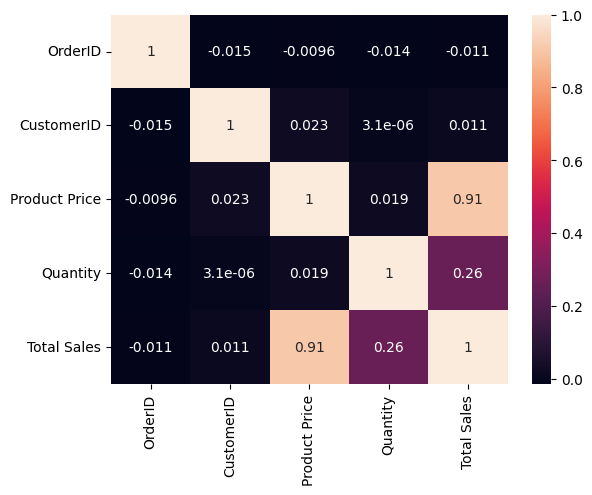

In [240]:
sns.heatmap(data.corr(), annot=True)



> Boxplot







In [241]:
#Memilih kolom bertipe data float dan integer yang akan dimunculkan di plot
data_to_plot = data.select_dtypes(include=['float64','int64'])

OrderID             Axes(0.125,0.712609;0.168478x0.167391)
CustomerID       Axes(0.327174,0.712609;0.168478x0.167391)
Product Price    Axes(0.529348,0.712609;0.168478x0.167391)
Quantity         Axes(0.731522,0.712609;0.168478x0.167391)
Total Sales         Axes(0.125,0.511739;0.168478x0.167391)
dtype: object

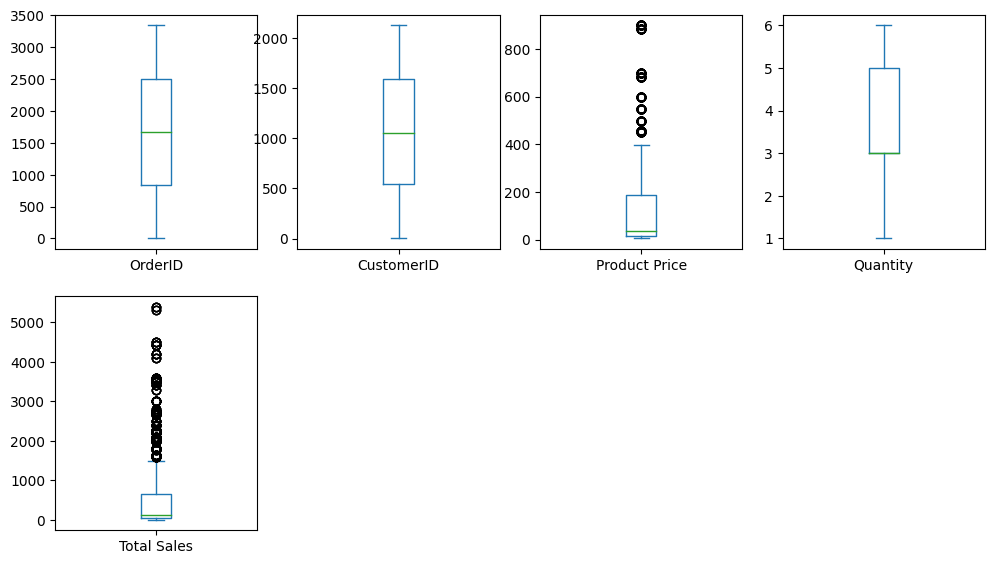

In [242]:
data_to_plot.plot(subplots=True,layout=(4,4),kind='box',figsize=(12,14))



> Histogram



In [243]:
numeric = data_to_plot.columns
numeric

Index(['OrderID', 'CustomerID', 'Product Price', 'Quantity', 'Total Sales'], dtype='object')

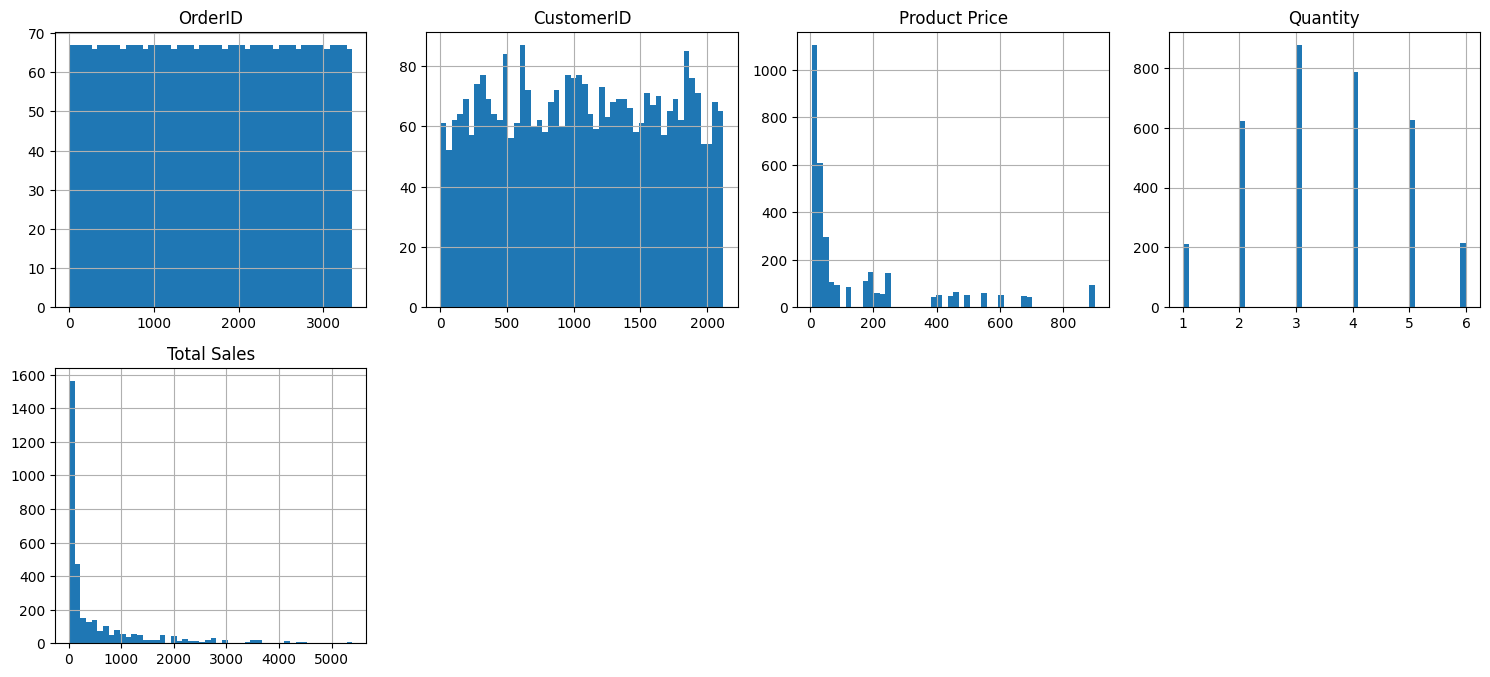

In [244]:
fig = plt.figure(figsize=(15,10))
ax=plt.gca() #

data.hist(bins=50,  ax = ax, layout=(3,4),column=numeric)
plt.tight_layout()
plt.show()

# **CUSTOME SEGMENTATION**

In [245]:
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)



> Check Last Purchase Activity Date



In [246]:
data['Date'].max()

Timestamp('2021-12-31 00:00:00')



> Menghitung nilai Recency, Frequency, dan Monetary


  *   **Recency**: Waktu terakhir melakukan transaksi
  *   **Frequency**: Frekuensi pelanggan melakukan transaksi produk
  *   **Monetary**: Jumlah uang yang digunakan pelanggan untuk membeli produk tersebut







>> RECENCY



In [247]:
# Defining Recency
recency = data[['Customers','Date']]

# Using Unique
recency.apply(pd.Series.unique)

# Grouping recency bedasarkan CUstomers
recency = recency.groupby(['Customers']).max()

In [248]:
# Set a reference date
latest_date = pd.to_datetime('2021-12-31')
latest_date

# Menghitung recency
recency_day = latest_date - recency['Date']
recency_day = pd.DataFrame(recency_day)
recency_day.head()

,Date
Customers,
Ab Walsh,626 days
Abagail Defraine,452 days
Abbey Cussins,189 days
Abel Strike,32 days
Abramo Jentzsch,314 days


In [249]:
recency = pd.DataFrame(recency_day['Date'].astype('timedelta64[D]'))
recency.columns = ['recency']
recency.shape

(1671, 1)



>> FREQUENCY



In [250]:
# Grouping Frequency berdasarkan Customers
frequency = data.groupby(by='Customers', as_index = False)['Date'].count()
frequency.columns = ['Customers','frequency']
frequency.head()

,Customers,frequency
0,Ab Walsh,1
1,Abagail Defraine,2
2,Abbey Cussins,1
3,Abel Strike,3
4,Abramo Jentzsch,3




>> MONETARY



In [251]:
# Grouping Monetary berdasarkan Customers
monetary = data.groupby(by = 'Customers',as_index = False)['Total Sales'].sum()
monetary.columns = ['Customers','monetary']
monetary.head()

,Customers,monetary
0,Ab Walsh,1996.00
1,Abagail Defraine,224.90
2,Abbey Cussins,899.00
3,Abel Strike,327.46
4,Abramo Jentzsch,3861.95



> Menggabungkan Recency, Frequency, dan Monetary




In [252]:
rf = recency.merge(frequency, on='Customers')
rfm = rf.merge(monetary, on = 'Customers')
rfm.head()

,Customers,recency,frequency,monetary
0,Ab Walsh,626.0,1,1996.00
1,Abagail Defraine,452.0,2,224.90
2,Abbey Cussins,189.0,1,899.00
3,Abel Strike,32.0,3,327.46
4,Abramo Jentzsch,314.0,3,3861.95


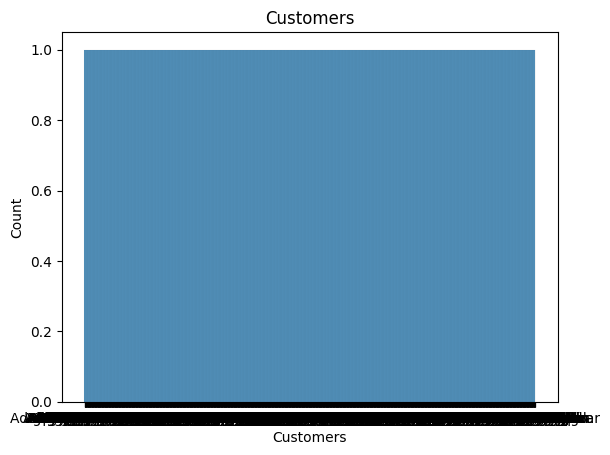

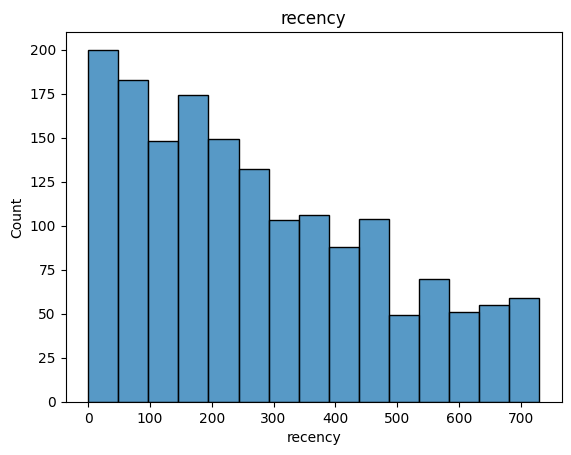

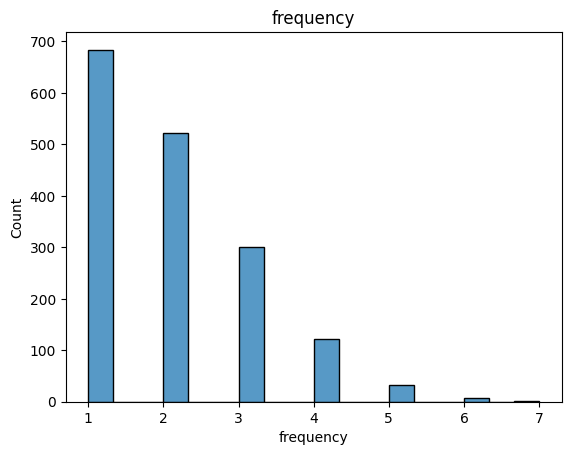

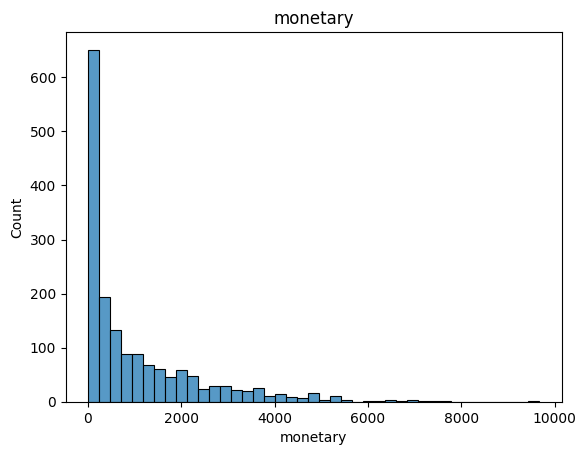

In [253]:
#Cek Distribusi Data
for col in rfm:
  x = rfm[col]
  sns.histplot(x)
  plt.title(col)
  plt.show();



> Menentukan Skor RFM



In [254]:
def binning_rfm(df):
  # Menghitung quantile untuk setiap variabel
  quantiles = df.quantile(q=[0.25, 0.5, 0.75])

  # Membuat bins untuk setiap variabel
  r_bins = [-np.inf] + list(quantiles['recency']) + [np.inf]
  f_bins = [-np.inf] + list(quantiles['frequency']) + [np.inf]
  m_bins = [-np.inf] + list(quantiles['monetary']) + [np.inf]

  # Membuat labels untuk setiap bins
  labels = [1,2,3,4]

  # Label untuk recency (Lower recency, higher ranking)
  labels_r = [4,3,2,1]

  #Bin Setiap Variabel menjadi lima group
  df['Recency'] = pd.cut(df['recency'], bins=r_bins, labels=labels_r).astype(int)
  df['Frequency'] = pd.cut(df['frequency'], bins=f_bins, labels=labels).astype(int)
  df['Monetary'] = pd.cut(df['monetary'], bins=m_bins, labels=labels).astype(int)

  # RFM score with average
  df['RFM_Score'] = np.round((df['Recency']+df['Frequency']+df['Monetary'])/3,2)

  return df

In [255]:
# bin the data
data_bin = binning_rfm(rfm)

In [256]:
# Cek Data
rfm.head()

,Customers,recency,frequency,monetary,Recency,Frequency,Monetary,RFM_Score
0,Ab Walsh,626.0,1,1996.00,1,1,4,2.00
1,Abagail Defraine,452.0,2,224.90,1,2,2,1.67
2,Abbey Cussins,189.0,1,899.00,3,1,3,2.33
3,Abel Strike,32.0,3,327.46,4,3,2,3.00
4,Abramo Jentzsch,314.0,3,3861.95,2,3,4,3.00




> Cek Tipe Data



In [257]:
rfm.dtypes

Customers     object
recency      float64
frequency      int64
monetary     float64
Recency        int64
Frequency      int64
Monetary       int64
RFM_Score    float64
dtype: object



> Tampilkan Statistika Deskriptif



In [258]:
rfm.describe()

,recency,frequency,monetary,Recency,Frequency,Monetary,RFM_Score
count,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000
mean,275.713944,1.998205,1050.120030,2.501496,1.967086,2.499701,2.322849
std,197.632204,1.073077,1336.265412,1.118635,0.990732,1.118636,0.795488
min,0.000000,1.000000,4.990000,1.000000,1.000000,1.000000,1.000000
25%,112.500000,1.000000,123.775000,1.500000,1.000000,1.500000,1.670000
50%,239.000000,2.000000,457.640000,3.000000,2.000000,2.000000,2.330000
75%,417.500000,3.000000,1521.980000,3.500000,3.000000,3.500000,3.000000
max,730.000000,7.000000,9666.460000,4.000000,4.000000,4.000000,4.000000


recency         Axes(0.125,0.712609;0.168478x0.167391)
frequency    Axes(0.327174,0.712609;0.168478x0.167391)
monetary     Axes(0.529348,0.712609;0.168478x0.167391)
Recency      Axes(0.731522,0.712609;0.168478x0.167391)
Frequency       Axes(0.125,0.511739;0.168478x0.167391)
Monetary     Axes(0.327174,0.511739;0.168478x0.167391)
RFM_Score    Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

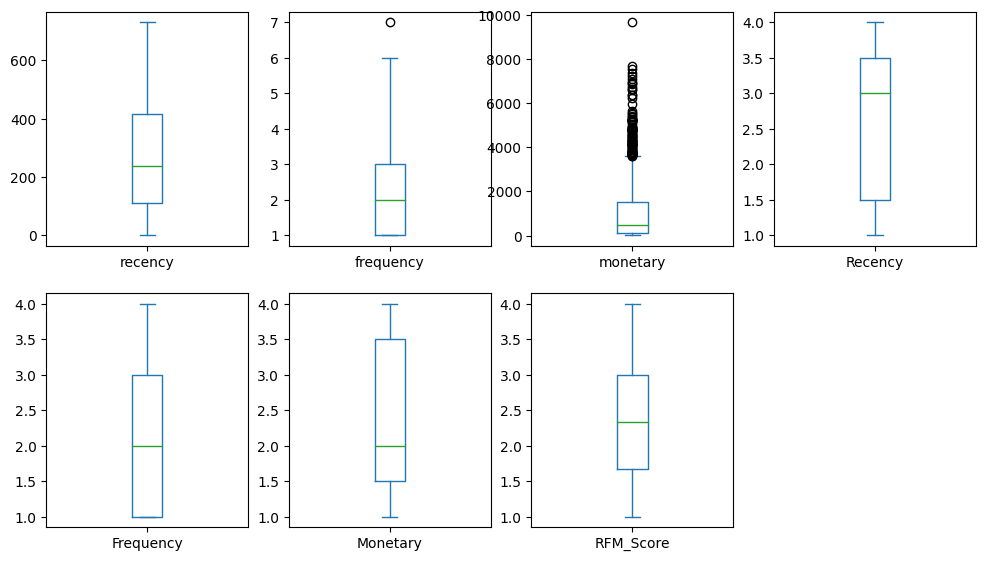

In [259]:
# Cek Boxplot
rfm.plot(subplots=True,layout=(4,4),kind='box',figsize=(12,14))



> Melakukan Ranking RFM



In [260]:
def assign_segment(rfm_df):
  # Membuat Label untuk setiap segment
  labels = ['At Risk Customers',
              'New Customers',
                'Potential Customers', 'Loyal Customers']
  rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'],
                              bins = [0,1,2,3,4], #karena labels berjumlah empat, maka jumlah bins ada 5 dimulai dengan angka 0
                              labels = labels)
  return rfm_df

In [261]:
# Membuat Label
rfm = assign_segment(rfm)

In [262]:
# Cek Data
rfm.head()

,Customers,recency,frequency,monetary,Recency,Frequency,Monetary,RFM_Score,Segment
0,Ab Walsh,626.0,1,1996.00,1,1,4,2.00,New Customers
1,Abagail Defraine,452.0,2,224.90,1,2,2,1.67,New Customers
2,Abbey Cussins,189.0,1,899.00,3,1,3,2.33,Potential Customers
3,Abel Strike,32.0,3,327.46,4,3,2,3.00,Potential Customers
4,Abramo Jentzsch,314.0,3,3861.95,2,3,4,3.00,Potential Customers




> Cek Data apakah ada missing value





In [263]:
rfm['RFM_Score'].isna().sum()

0



> Mencari Mean untuk Setiap Segment



In [264]:
rfm.groupby('Segment').agg({'recency':'mean',
                            'frequency':'mean',
                            'monetary':'mean'}).round(2)

,recency,frequency,monetary
Segment,,,
At Risk Customers,580.73,1.00,61.16
New Customers,355.42,1.28,412.60
Potential Customers,206.04,2.25,1221.31
Loyal Customers,104.43,3.49,2542.57


In [265]:
rfm.head(n=2)

,Customers,recency,frequency,monetary,Recency,Frequency,Monetary,RFM_Score,Segment
0,Ab Walsh,626.0,1,1996.0,1,1,4,2.00,New Customers
1,Abagail Defraine,452.0,2,224.9,1,2,2,1.67,New Customers


In [266]:
# Cek Duplikasi Data
rfm.duplicated().sum()

0



> Menggabungkan Data (Data dan rfm)



In [267]:
Data = data.merge(rfm, on = 'Customers').drop(columns= ['recency','frequency',
                                                        'monetary'])
Data.head()

,OrderID,Date,CustomerID,Customers,Customers Email,Customer City,Product Name,Category Name,Product Price,Quantity,Total Sales,Recency,Frequency,Monetary,RFM_Score,Segment
0,1,2020-01-01,1866,Farrand Vasler,fvaslerqt@comsenz.com,Jackson,Polar Robots,eBooks,23.99,2,47.98,1,1,1,1.0,At Risk Customers
1,2,2020-01-01,1567,Terencio McKern,tmckernot@tinyurl.com,Katy,RWW-75 Robot,Robots,883.00,3,2649.00,1,1,4,2.0,New Customers
2,3,2020-01-01,2064,Geordie Stiggers,gstiggersdd@eventbrite.com,Saint Petersburg,Drone Video Techniques,Training Videos,37.99,6,227.94,4,3,2,3.0,Potential Customers
3,2818,2021-08-28,2064,Geordie Stiggers,gstiggersdd@eventbrite.com,Saint Petersburg,All Eyes Drone Blueprint,Blueprints,9.99,3,29.97,4,3,2,3.0,Potential Customers
4,3120,2021-11-09,2064,Geordie Stiggers,gstiggersdd@eventbrite.com,Saint Petersburg,Understanding Artificial Intelligence,eBooks,19.50,5,97.50,4,3,2,3.0,Potential Customers


In [268]:
Data.duplicated().sum()

0

In [269]:
rfm.head()

,Customers,recency,frequency,monetary,Recency,Frequency,Monetary,RFM_Score,Segment
0,Ab Walsh,626.0,1,1996.00,1,1,4,2.00,New Customers
1,Abagail Defraine,452.0,2,224.90,1,2,2,1.67,New Customers
2,Abbey Cussins,189.0,1,899.00,3,1,3,2.33,Potential Customers
3,Abel Strike,32.0,3,327.46,4,3,2,3.00,Potential Customers
4,Abramo Jentzsch,314.0,3,3861.95,2,3,4,3.00,Potential Customers




> Data Visualization




>> Boxplot



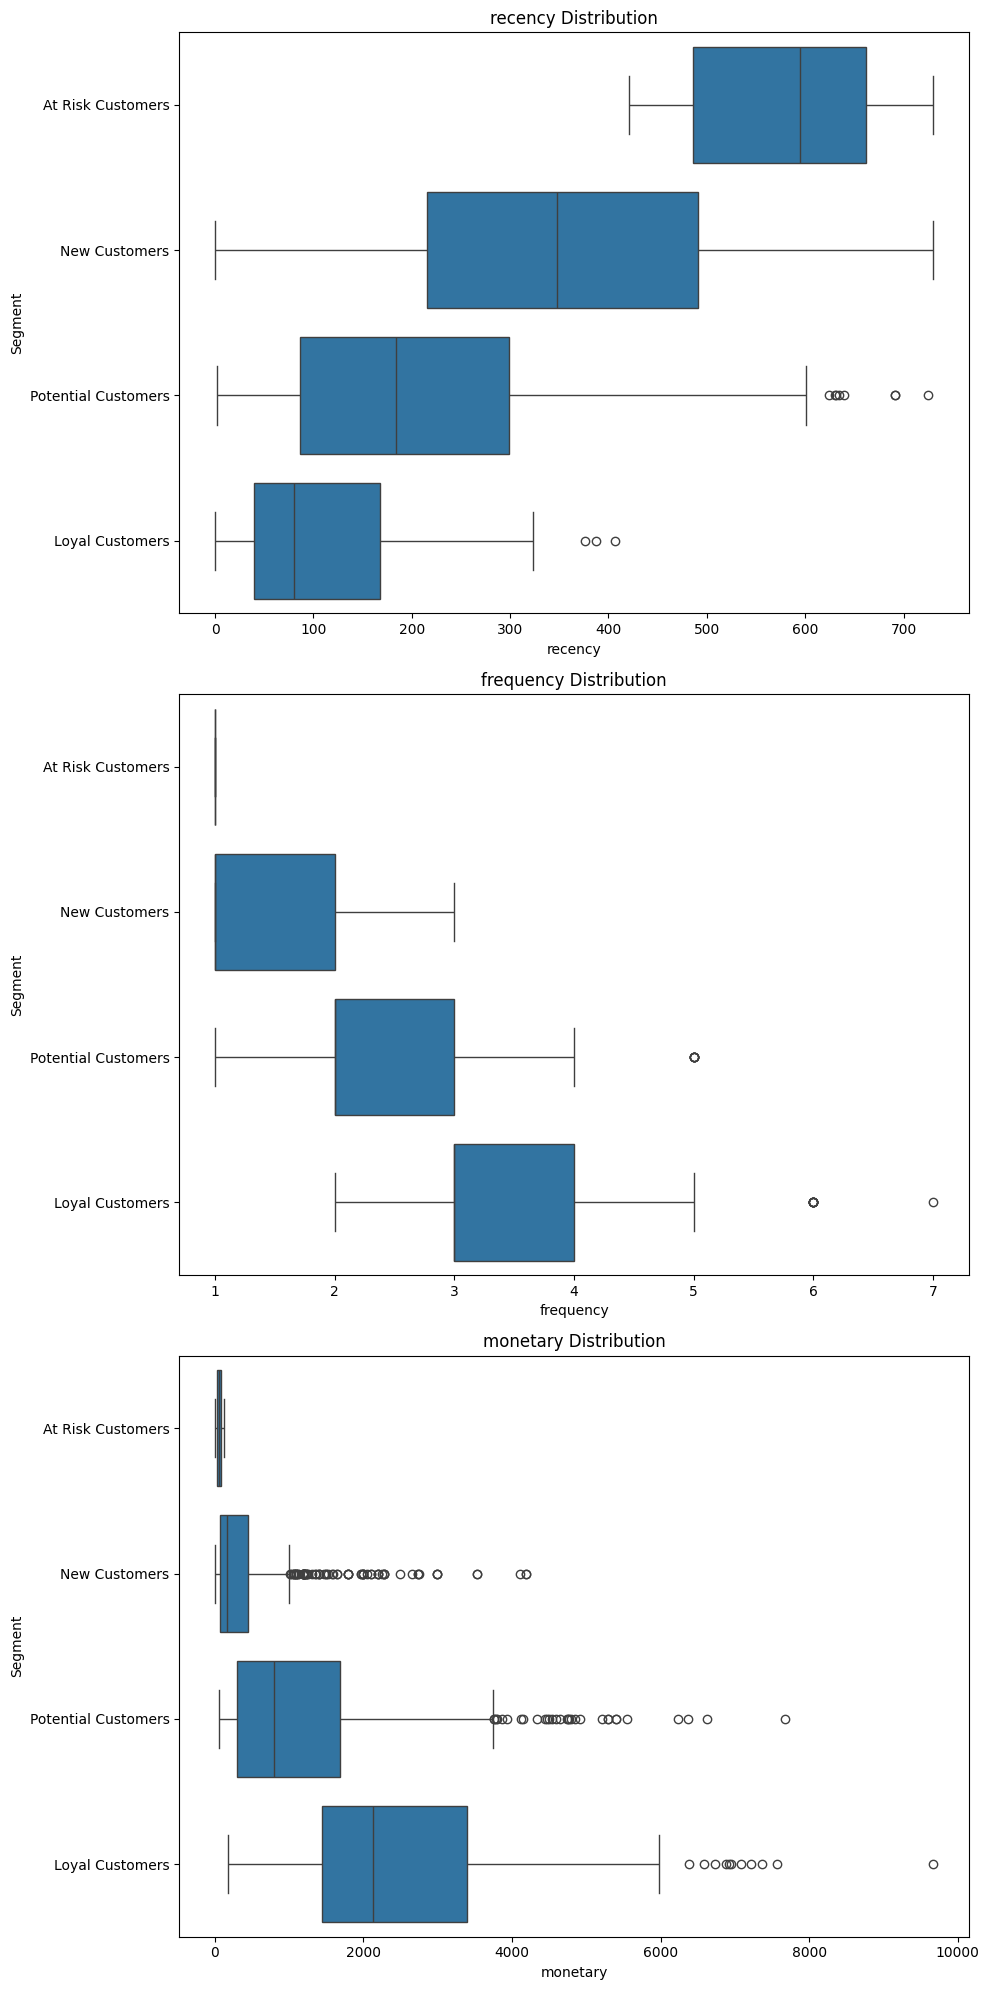

In [270]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Iterate over column
for i, col in enumerate(['recency', 'frequency', 'monetary']):
    sns.boxplot(data = data_bin,
                y = 'Segment',
                x = col,
                ax = axes[i])

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()



>> Bar Chart Setiap Segment



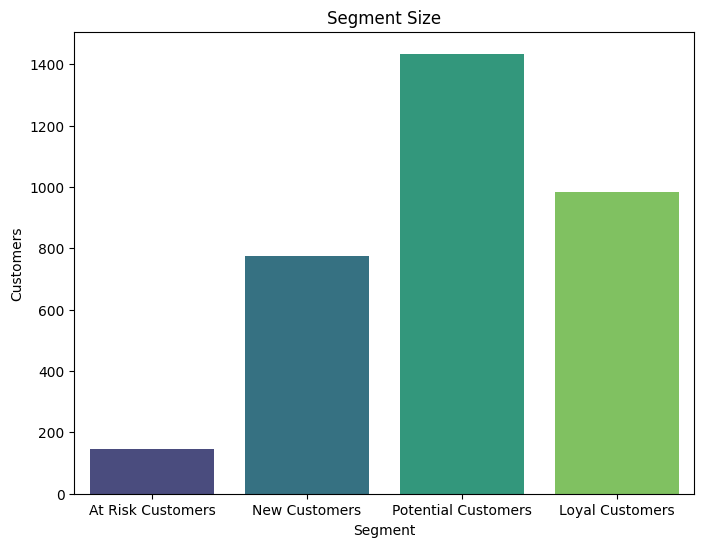

In [271]:
segment_sizes = Data.groupby('Segment')[['Customers']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Segment', y='Customers', data=segment_sizes, palette = 'viridis')
plt.title('Segment Size')
plt.xlabel('Segment')
plt.ylabel('Customers')
plt.show()

In [272]:
segment_sizes = Data.groupby('Segment')[['Customers']].count().reset_index()
segment_sizes

,Segment,Customers
0,At Risk Customers,146
1,New Customers,775
2,Potential Customers,1434
3,Loyal Customers,984


# **Memindahkan Data ke Spreadsheet**

In [274]:
# Mengubah tipe data pada kolom Date ke string
Data['Date'] = Data['Date'].astype('str')

In [275]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread
import pandas as pd

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

spreadsheet_key = '1bp7UrcUkfGnrkZGsnbaqpvsJtnnrpuHWUhFQ8iau0ac'
workbook = gc.open_by_key(spreadsheet_key)

workbook.values_update(
  'Sheet1!A:BB',
  params={
      'valueInputOption': 'USER_ENTERED'
  },
  body={
      'values': [Data.columns.values.tolist()] + Data.values.tolist()
  }
)

{'spreadsheetId': '1bp7UrcUkfGnrkZGsnbaqpvsJtnnrpuHWUhFQ8iau0ac',
 'updatedRange': 'Sheet1!A1:P3340',
 'updatedRows': 3340,
 'updatedColumns': 16,
 'updatedCells': 53440}